In [38]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [39]:
import os, json, pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

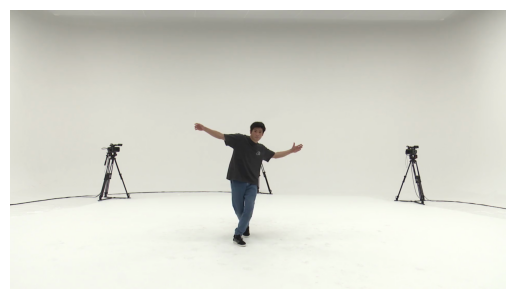

In [40]:
# showing first frame of the raw video
video_path = "../data/raw/gBR/ch01/gBR_sBM_c01_d04_mBR0_ch01.mp4"

cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
cap.release()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [41]:
# extracting 2D keypoints
keypoint_path = "../data/processed/aist_plusplus_final/keypoints2d/gBR_sBM_cAll_d04_mBR0_ch01.pkl"

with open(keypoint_path, 'rb') as f:
    data = pickle.load(f)

print(type(data))

print(list(data.keys()))

<class 'dict'>
['keypoints2d', 'det_scores', 'timestamps']


In [42]:
# indexing 2D keypoints of the first fram
frame_keypoints = data['keypoints2d'][0]
print(frame_keypoints[0].shape)
print(frame_keypoints[0])

(17, 3)
[[9.6100000e+02 4.8100000e+02 9.6545148e-01]
 [9.7200000e+02 4.7300000e+02 9.4191366e-01]
 [9.5300000e+02 4.7000000e+02 9.6809095e-01]
 [9.7700000e+02 4.8400000e+02 3.6107743e-01]
 [9.3300000e+02 4.6700000e+02 9.3595171e-01]
 [9.7200000e+02 5.3800000e+02 7.3120236e-01]
 [8.9000000e+02 5.0000000e+02 7.7934998e-01]
 [1.0270000e+03 5.6900000e+02 8.0481589e-01]
 [8.1800000e+02 4.8900000e+02 8.3263254e-01]
 [1.0890000e+03 5.4700000e+02 8.4384608e-01]
 [7.5600000e+02 4.6200000e+02 8.9048630e-01]
 [9.3900000e+02 6.6700000e+02 7.4520731e-01]
 [8.7900000e+02 6.6200000e+02 7.4151969e-01]
 [9.2500000e+02 7.7400000e+02 6.9970977e-01]
 [8.8100000e+02 7.6600000e+02 6.2636536e-01]
 [8.8400000e+02 8.7000000e+02 7.1569395e-01]
 [9.1700000e+02 8.3400000e+02 2.3908097e-01]]


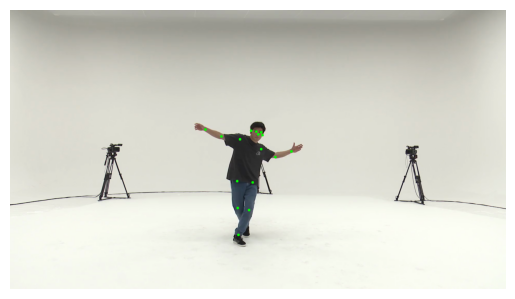

In [43]:
# marking keypoints on raw video frame for inspection
for (x, y, conf) in frame_keypoints[0]:
    if conf > 0.3:
        cv2.circle(frame, (int(x), int(y)), 5, (0,255,0), -1)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


True
VideoWriter opened successfully


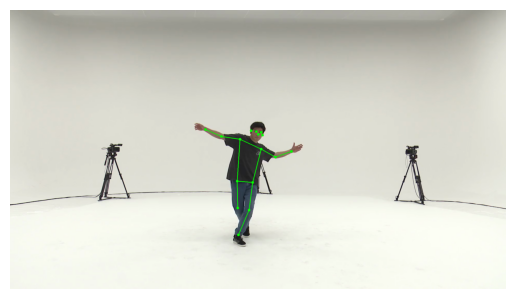

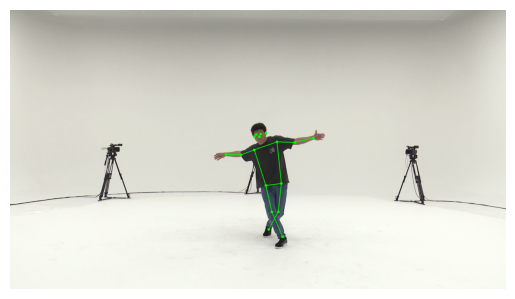

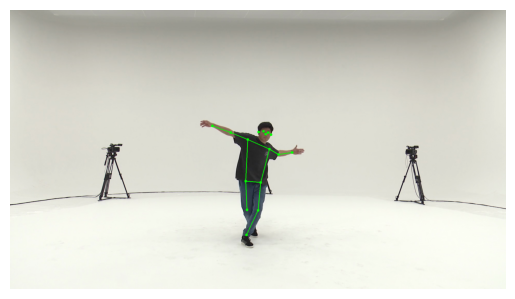

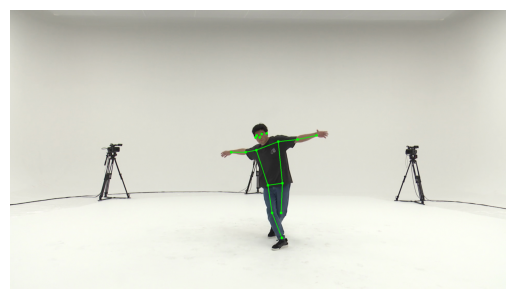

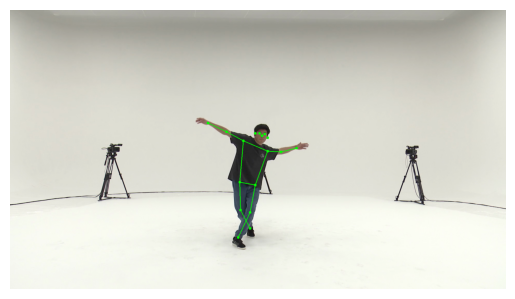

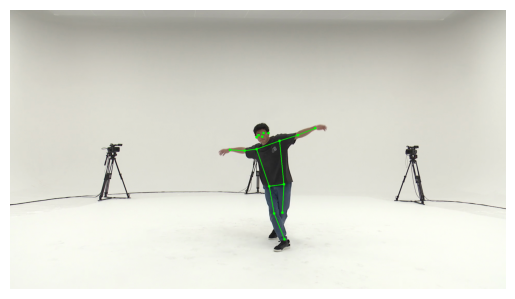

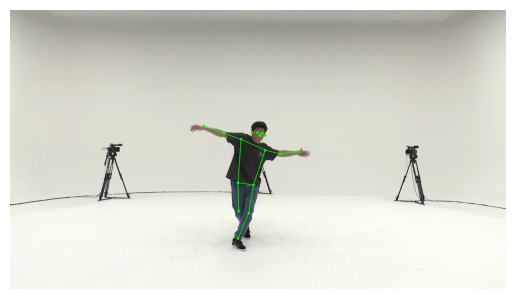

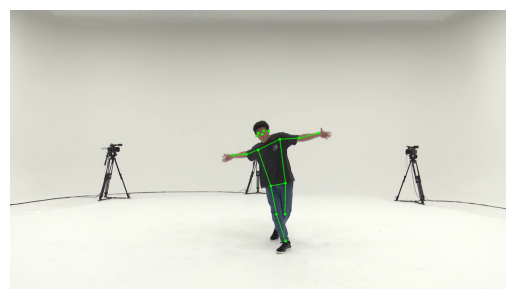

Failed to read from webcam


In [44]:
from src.parser.live_video_parser import VideoParser
from src.util.visualizer import visualize_pose

parser = VideoParser(video_path)

out_path = "../data/processed/notebooks/parser_keypoints_overlay.mp4"
print(os.path.exists(out_path))

fourcc = cv2.VideoWriter_fourcc(*"avc1")
fps = 60
w = int(parser.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(parser.cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter(out_path, fourcc, fps, (w, h))

if not writer.isOpened():
    print("Error: VideoWriter failed to open")
else:
    print("VideoWriter opened successfully")

frame_idx = 0

for keypoints, pkt in zip(frame_keypoints, parser):
    frame = pkt['frame']

    frame = visualize_pose(frame, keypoints)
    
    if frame_idx % 90 == 0:
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
    
    writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    frame_idx += 1

writer.release()
    


In [45]:
from IPython.display import Video

Video(out_path)

Frame 0:
  Processing FPS: 0.0
  Real-time factor: 0.00x


I0000 00:00:1763063452.046727  956897 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M4 Max
W0000 00:00:1763063452.101012  971608 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763063452.104115  971619 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


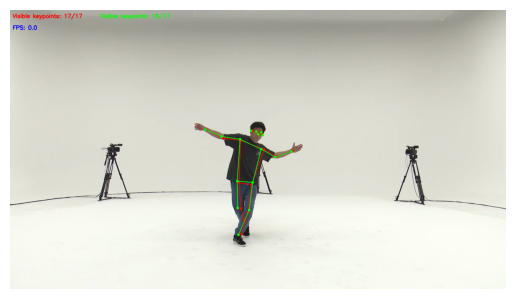

Frame 45:
  Processing FPS: 43.0
  Real-time factor: 0.00x


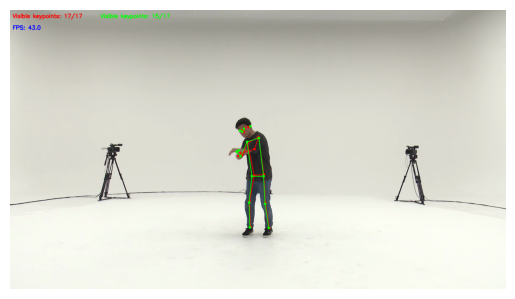

Frame 90:
  Processing FPS: 46.0
  Real-time factor: 0.00x


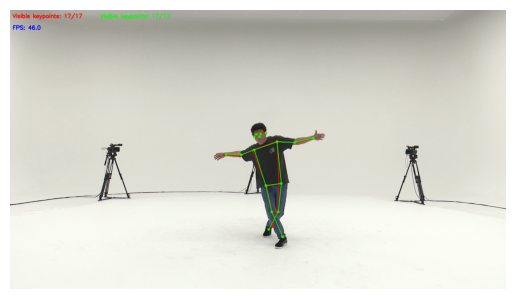

Frame 135:
  Processing FPS: 47.0
  Real-time factor: 0.00x


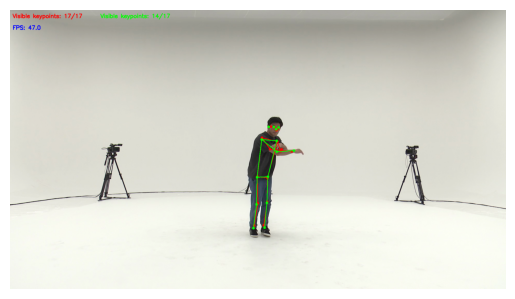

Frame 180:
  Processing FPS: 47.0
  Real-time factor: 0.00x


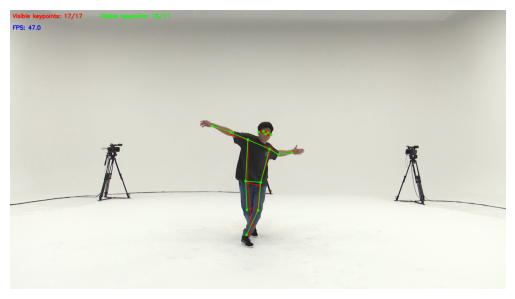

Frame 225:
  Processing FPS: 47.0
  Real-time factor: 0.00x


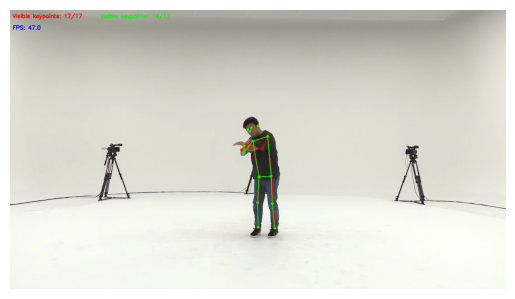

Frame 270:
  Processing FPS: 47.0
  Real-time factor: 0.00x


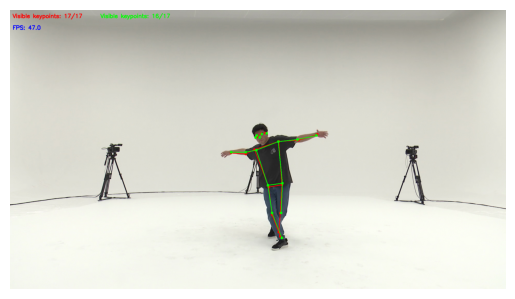

Frame 315:
  Processing FPS: 48.0
  Real-time factor: 0.00x


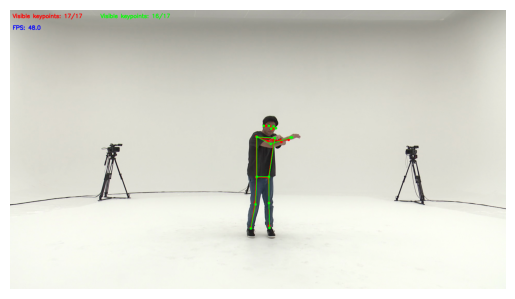

Frame 360:
  Processing FPS: 48.0
  Real-time factor: 0.00x


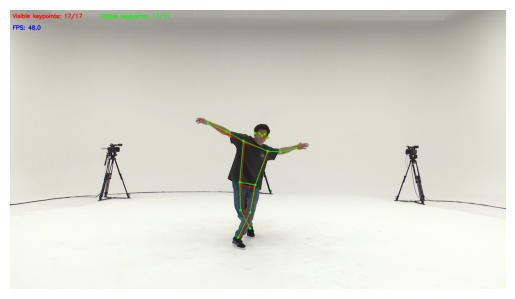

Frame 405:
  Processing FPS: 48.0
  Real-time factor: 0.00x


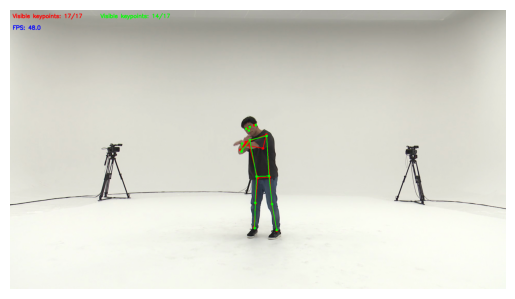

Frame 450:
  Processing FPS: 48.0
  Real-time factor: 0.00x


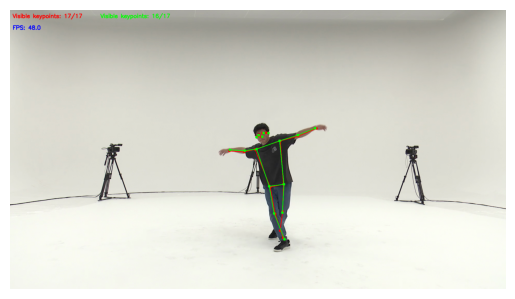

Frame 495:
  Processing FPS: 48.0
  Real-time factor: 0.00x


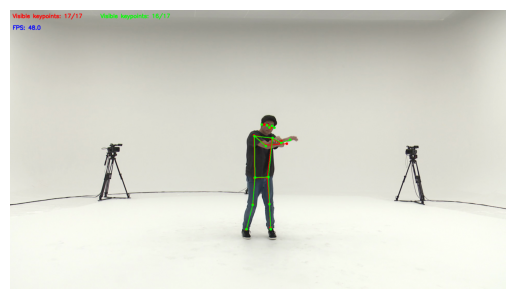

Frame 540:
  Processing FPS: 48.0
  Real-time factor: 0.00x


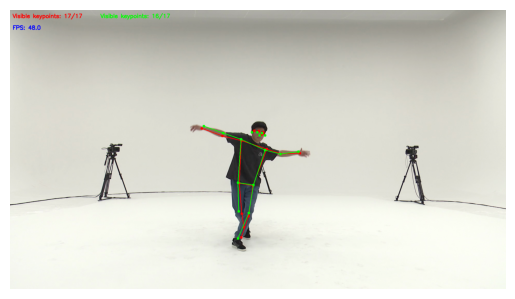

Frame 585:
  Processing FPS: 48.0
  Real-time factor: 0.00x


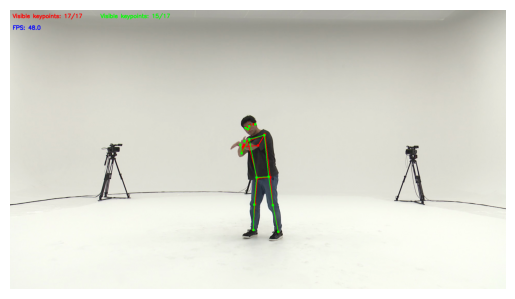

Frame 630:
  Processing FPS: 48.0
  Real-time factor: 0.00x


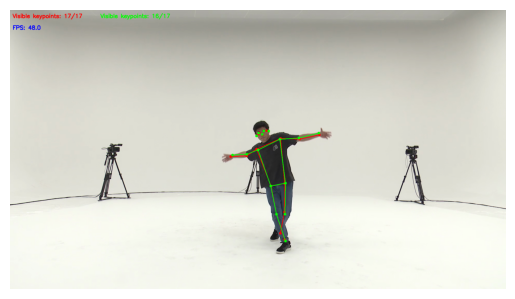

Frame 675:
  Processing FPS: 48.0
  Real-time factor: 0.00x


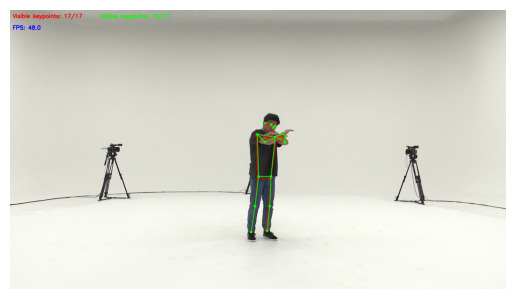

Failed to read from webcam

FINAL RESULTS
Total frames: 719
Total time: 15.0s
Average processing FPS: 48.1
Real-time factor: 0.80x
Target FPS: 60


In [46]:
import time
from src.model.media_pipe_pose import MediaPipePose
from src.util.visualizer import visualize_preds_vs_ground_truths

parser = VideoParser(video_path)

out_path = "../data/processed/notebooks/mediapipe_keypoints_overlay.mp4"

writer = cv2.VideoWriter(out_path, fourcc, fps, (w, h))

model = MediaPipePose(static_image_mode=True, model_complexity=0)

frame_idx = 0
start_time = time.time()

for keypoints, pkt in zip(frame_keypoints, parser):
    frame = pkt['frame']

    pred_keypoints = model.detect_landmarks(frame)
    
    pred_keypoints = model.convert_to_aist17(pred_keypoints)

    elapsed = time.time() - start_time
    current_fps = frame_idx // elapsed if elapsed > 0 else 0
    real_time_factor = current_fps // fps
    
    frame = visualize_preds_vs_ground_truths(frame, pred_keypoints, keypoints, fps=current_fps)
    
    if frame_idx % 45 == 0:
        print(f"Frame {frame_idx}:")
        print(f"  Processing FPS: {current_fps:.1f}")
        print(f"  Real-time factor: {real_time_factor:.2f}x")

        plt.imshow(frame)
        plt.axis('off')
        plt.show()
    
    writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    frame_idx += 1

writer.release()

# Final stats
total_time = time.time() - start_time
final_fps = frame_idx / total_time

print(f"\n{'='*50}")
print(f"FINAL RESULTS")
print(f"{'='*50}")
print(f"Total frames: {frame_idx}")
print(f"Total time: {total_time:.1f}s")
print(f"Average processing FPS: {final_fps:.1f}")
print(f"Real-time factor: {final_fps/fps:.2f}x")
print(f"Target FPS: {fps}")

In [47]:
Video(out_path)